<h1>FBI Gun Data Analysis</h1>
<h3>By: Jack Ross</h3>

<h2>Questions</h2>

1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reads in census data as a dataframe
census_data_df = pd.read_csv('us-census-data.csv')

# Reads in gun data through Excel
gun_data_df = pd.read_excel('gun_data.xlsx')

# Converts Excel file to a CVS
gun_data_df.to_csv('gun_data_df')

<h2>2016 U.S. Census Data</h2>

In [2]:
census_data_df

Fact  \
0        Population estimates, July 1, 2016,  (V2016)   
1   Population estimates base, April 1, 2010,  (V2...   
2   Population, percent change - April 1, 2010 (es...   
3                   Population, Census, April 1, 2010   
4   Persons under 5 years, percent, July 1, 2016, ...   
5       Persons under 5 years, percent, April 1, 2010   
6   Persons under 18 years, percent, July 1, 2016,...   
7      Persons under 18 years, percent, April 1, 2010   
8   Persons 65 years and over, percent,  July 1, 2...   
9   Persons 65 years and over, percent, April 1, 2010   
10   Female persons, percent,  July 1, 2016,  (V2016)   
11             Female persons, percent, April 1, 2010   
12       White alone, percent, July 1, 2016,  (V2016)   
13  Black or African American alone, percent, July...   
14  American Indian and Alaska Native alone, perce...   
15       Asian alone, percent, July 1, 2016,  (V2016)   
16  Native Hawaiian and Other Pacific Islander alo...   
17  Two or More Races, percent, July 1, 2016,  (V2...   
18  Hispanic or Latino, percent, July 1, 2016,  (V...   
19  White alone, not Hispanic or Latino, percent, ...   
20                                Veterans, 2011-2015   
21           Foreign born persons, percent, 2011-2015   
22             Housing units,  July 1, 2016,  (V2016)   
23                       Housing units, April 1, 2010   
24        Owner-occupied housing unit rate, 2011-2015   
25  Median value of owner-occupied housing units, ...   
26  Median selected monthly owner costs -with a mo...   
27  Median selected monthly owner costs -without a...   
28                       Median gross rent, 2011-2015   
29                             Building permits, 2016   
..                                                ...   
55                                    All firms, 2012   
56                              Men-owned firms, 2012   
57                            Women-owned firms, 2012   
58                         Minority-owned firms, 2012   
59                      Nonminority-owned firms, 2012   
60                          Veteran-owned firms, 2012   
61                       Nonveteran-owned firms, 2012   
62                   Population per square mile, 2010   
63                    Land area in square miles, 2010   
64                                          FIPS Code   
65                                                NaN   
66  NOTE: FIPS Code values are enclosed in quotes ...   
67                                                NaN   
68                                        Value Notes   
69                                                  1   
70                                                NaN   
71                                         Fact Notes   
72                                                (a)   
73                                                (b)   
74                                                (c)   
75                                                NaN   
76                                        Value Flags   
77                                                  -   
78                                                  D   
79                                                  F   
80                                                 FN   
81                                                NaN   
82                                                  S   
83                                                  X   
84                                                  Z   

                                            Fact Note    Alabama      Alaska  \
0                                                 NaN  4,863,300     741,894   
1                                                 NaN  4,780,131     710,249   
2                                                 NaN      1.70%       4.50%   
3                                                 NaN  4,779,736     710,231   
4                                                 NaN      6.00%       7.30%   
5                                 

In [3]:
census_data_df.describe()

Fact Fact Note Alabama Alaska Arizona Arkansas California Colorado  \
count    80        28      65     65      65       65         65       65   
unique   80        15      65     64      64       64         63       64   
top     (a)       (c)    "01"  7.30%  50.30%   50.90%      6.80%    3.30%   
freq      1         6       1      2       2        2          2        2   

       Connecticut Delaware   ...   South Dakota Tennessee   Texas   Utah  \
count           65       65   ...             65        65      65     65   
unique          63       64   ...             65        64      64     64   
top          5.70%   51.60%   ...          0.016     0.048  50.40%  2.50%   
freq             2        2   ...              1         2       2      2   

       Vermont   Virginia Washington West Virginia Wisconsin Wyoming  
count       65         65         65            65        65      65  
unique      63         65         65            64        65      64  
top      1.90%  8,001,041     18.90%         1.50%     6.30%   7.10%  
freq         2          1          1             2         1       2  

[4 rows x 52 columns]

In [4]:
gun_data_df

month                 state    permit  permit_recheck  handgun  \
0      2017-09               Alabama   16717.0             0.0   5734.0   
1      2017-09                Alaska     209.0             2.0   2320.0   
2      2017-09               Arizona    5069.0           382.0  11063.0   
3      2017-09              Arkansas    2935.0           632.0   4347.0   
4      2017-09            California   57839.0             0.0  37165.0   
5      2017-09              Colorado    4356.0             0.0  15751.0   
6      2017-09           Connecticut    4343.0           673.0   4834.0   
7      2017-09              Delaware     275.0             0.0   1414.0   
8      2017-09  District of Columbia       1.0             0.0     56.0   
9      2017-09               Florida   10784.0             0.0  39199.0   
10     2017-09               Georgia   12074.0             0.0  10933.0   
11     2017-09                  Guam       0.0             0.0     74.0   
12     2017-09                Hawaii     946.0             0.0      0.0   
13     2017-09                 Idaho    5162.0             0.0   3058.0   
14     2017-09              Illinois   15712.0         71432.0  18290.0   
15     2017-09               Indiana   18241.0             0.0  16093.0   
16     2017-09                  Iowa    5847.0          1217.0    151.0   
17     2017-09                Kansas    1567.0             3.0   4518.0   
18     2017-09              Kentucky  378384.0             0.0   8112.0   
19     2017-09             Louisiana    1827.0             0.0  10495.0   
20     2017-09                 Maine     783.0             0.0   3026.0   
21     2017-09       Mariana Islands       0.0             0.0     12.0   
22     2017-09              Maryland    2424.0             0.0   3389.0   
23     2017-09         Massachusetts    7160.0             0.0   4749.0   
24     2017-09              Michigan   16571.0            19.0   8654.0   
25     2017-09             Minnesota   25645.0             0.0   4862.0   
26     2017-09           Mississippi    1362.0             0.0   6260.0   
27     2017-09              Missouri     791.0             0.0  16993.0   
28     2017-09               Montana    1076.0             0.0   2395.0   
29     2017-09              Nebraska    3036.0           113.0    110.0   
...        ...                   ...       ...             ...      ...   
12455  1998-11             Minnesota       9.0             NaN     27.0   
12456  1998-11           Mississippi       0.0             NaN    286.0   
12457  1998-11              Missouri       0.0             NaN    116.0   
12458  1998-11               Montana       0.0             NaN    101.0   
12459  1998-11              Nebraska      88.0             NaN      1.0   
12460  1998-11                Nevada       0.0             NaN     75.0   
12461  1998-11         New Hampshire       0.0             NaN      8.0   
12462  1998-11            New Jersey       0.0             NaN     20.0   
12463  1998-11            New Mexico       0.0             NaN     86.0   
12464  1998-11              New York       0.0             NaN     40.0   
12465  1998-11        North Carolina     524.0             NaN     87.0   
12466  1998-11          North Dakota       0.0             NaN     20.0   
12467  1998-11                  Ohio       0.0             NaN    502.0   
12468  1998-11              Oklahoma       0.0             NaN    259.0   
12469  1998-11                Oregon       0.0             NaN    153.0   
12470  1998-11          Pennsylvania       0.0             NaN      5.0   
12471  1998-11           Puerto Rico       0.0             NaN      1.0   
12472  1998-11          Rhode Island       0.0             NaN     13.0   
12473  1998-11        South Carolina       0.0             NaN      0.0   
12474  1998-11          South Dakota       0.0             NaN      8.0   
12475  1998-11             Tennessee       0.0             NaN     19.0   
12476  1998-11                 Tex

In [5]:
gun_data_df.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other      ...        returned_other  \
count      10540.000000    5115.000000      ...           1815.000000   
mean           7.834156       0.165591      ...              1.027548   
std           16.468028       1.057105      ...              4.386296   
min            0.000000       0.000000      ...              0.000000   
25%            0.000000       0.000000      ...              0.000000   
50%            1.000000       0.000000      ...              0.000000   
75%            8.000000       0.000000      ...              0.000000   
max          269.000000      49.000000      ...             64.000000   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
count       990.000000        825.000000           2750.000000   
mean          0.076768          0.087273             14.936000   
std           0.634503          0.671649             71.216021   
min           0.000000          0.000000              0.000000   
25%           0.000000          0.000000              0.000000   
50%           0.000000          0.000000              0.000000   
75%           0.000000          0.000000              2.000000   
max          12.000000         12.000000           1017.000000   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
count            2750.000000         2750.000000               2475.000000   
mean               11.602909            1.030182                  0.402020   
std                54.253090            4.467843                  1.446568   
min                 0.000000            0.000000                  0.000000   
25%                 0.000000            0.000000                  0.000000   
50%                 0.000000            0.000000                  0.000000   
75%                 4.000000            0.000000                  0.000000   
max               777.000000           71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

<h2>Pearson's R Corelation</h2>
<h3>Total mean guns purchased and total mean permits

In [6]:
# Correlation equation for Pearson's R
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [7]:
print ("Correlation between mean total guns purchased and total mean permits.")
print correlation(gun_data_df['totals'], gun_data_df['permit'])
print ("On a scale of -1 to +1")

Correlation between mean total guns purchased and total mean permits.
0.845502230582
On a scale of -1 to +1


In [8]:
totals_by_permit = gun_data_df.groupby('totals').mean()['permit']

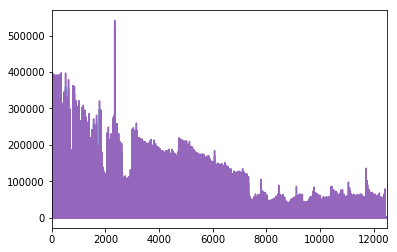

In [19]:
gun_data_df.plot(legend=None)